In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-wenpn25d
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-wenpn25d
     |████████████████████████████████| 952kB 15.9MB/s 
  Created wheel for albumentations: filename=albumentations-0.5.2-cp36-none-any.whl size=81845 sha256=dca1229f17063c3880b1947ce9461a39d7eb14bd9ff49f419160bed5b927c461
  Stored in directory: /tmp/pip-ephem-wheel-cache-8e72xavo/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
cd /content/drive/MyDrive/The School of AI/EVA Program/Assignment_9

/content/drive/MyDrive/The School of AI/EVA Program/Assignment_9


### Importing modules

In [9]:
from files.Albumentationtransform import AlbumentationTransforms
from files.train_test_transform import train_test_transform
from files.train_test_data_loader import train_test_data_loader
from files.input_data_explore import show_train_data
from files.resnet import ResNet18
from files.trainer import Training
from files.misclassified_images import misclassified_images
from files.gradcam import GradCAM
from files.utils import visualize_cam, denormalize


In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

#### Calculating mean and std for normalization

In [11]:
train_transforms, test_transforms = train_test_transform()

train_data_set = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform= train_transforms)
test_data_set = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform= test_transforms)

train_data = train_data_set.data
test_data = test_data_set.data

train_test_combine = np.concatenate((train_data, test_data),axis=0)
train_test_combine.reshape(-1,train_test_combine.shape[-1])
mean=train_test_combine.reshape(-1,train_test_combine.shape[-1]).mean(0)/255
std=train_test_combine.reshape(-1,train_test_combine.shape[-1]).std(0)/255

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Applying transformations to the data and getting train and test data loader

In [12]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_transforms, test_transforms = train_test_transform(normalize= True, mean= mean, std= std)
train_loader, test_loader = train_test_data_loader(train_transforms, test_transforms)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

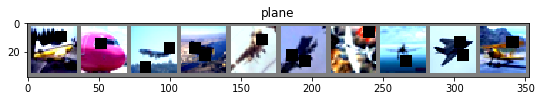

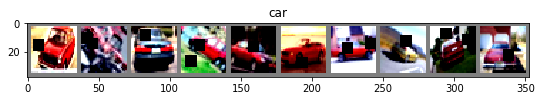

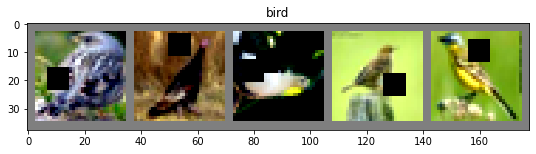

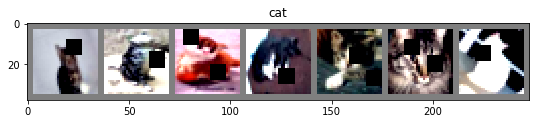

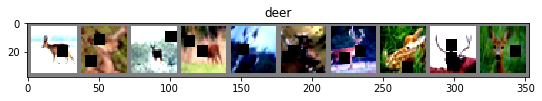

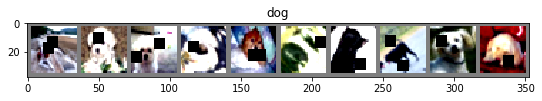

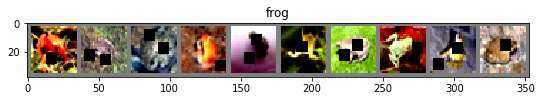

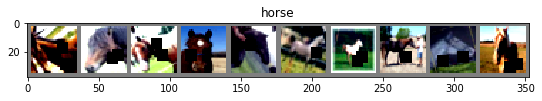

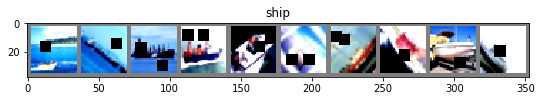

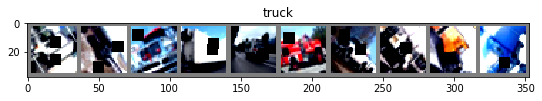

In [13]:
show_train_data(train_loader, classes)

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model =  ResNet18()
model.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)    
trainer = Training(model, optimizer, train_loader, test_loader, device)
train_metric, test_metric = trainer.train(n_epoch=40)

Training the model for 40 epochs
EPOCH: 1




Test set: Average loss: 0.0082, Accuracy: 6333/10000 (63.33%)

EPOCH: 2




Test set: Average loss: 0.0067, Accuracy: 7137/10000 (71.37%)

EPOCH: 3




Test set: Average loss: 0.0060, Accuracy: 7416/10000 (74.16%)

EPOCH: 4




Test set: Average loss: 0.0064, Accuracy: 7363/10000 (73.63%)

EPOCH: 5




Test set: Average loss: 0.0046, Accuracy: 8017/10000 (80.17%)

EPOCH: 6




Test set: Average loss: 0.0051, Accuracy: 7847/10000 (78.47%)

EPOCH: 7




Test set: Average loss: 0.0041, Accuracy: 8234/10000 (82.34%)

EPOCH: 8




Test set: Average loss: 0.0042, Accuracy: 8278/10000 (82.78%)

EPOCH: 9




Test set: Average loss: 0.0037, Accuracy: 8402/10000 (84.02%)

EPOCH: 10




Test set: Average loss: 0.0040, Accuracy: 8378/10000 (83.78%)

EPOCH: 11




Test set: Average loss: 0.0037, Accuracy: 8489/10000 (84.89%)

EPOCH: 12




Test set: Average loss: 0.0034, Accuracy: 8561/10000 (85.61%)

EPOCH: 13




Test set: Average loss: 0.0032, Accuracy: 8647/10000 (86.47%)

EPOCH: 14




Test set: Average loss: 0.0035, Accuracy: 8576/10000 (85.76%)

EPOCH: 15




Test set: Average loss: 0.0031, Accuracy: 8694/10000 (86.94%)

EPOCH: 16




Test set: Average loss: 0.0032, Accuracy: 8691/10000 (86.91%)

EPOCH: 17




Test set: Average loss: 0.0030, Accuracy: 8750/10000 (87.50%)

EPOCH: 18




Test set: Average loss: 0.0032, Accuracy: 8687/10000 (86.87%)

EPOCH: 19




Test set: Average loss: 0.0031, Accuracy: 8736/10000 (87.36%)

EPOCH: 20




Test set: Average loss: 0.0032, Accuracy: 8741/10000 (87.41%)

EPOCH: 21




Test set: Average loss: 0.0030, Accuracy: 8827/10000 (88.27%)

EPOCH: 22




Test set: Average loss: 0.0031, Accuracy: 8784/10000 (87.84%)

EPOCH: 23




Test set: Average loss: 0.0029, Accuracy: 8831/10000 (88.31%)

EPOCH: 24




Test set: Average loss: 0.0030, Accuracy: 8860/10000 (88.60%)

EPOCH: 25




Test set: Average loss: 0.0029, Accuracy: 8865/10000 (88.65%)

EPOCH: 26




Test set: Average loss: 0.0029, Accuracy: 8921/10000 (89.21%)

EPOCH: 27




Test set: Average loss: 0.0029, Accuracy: 8872/10000 (88.72%)

EPOCH: 28




Test set: Average loss: 0.0029, Accuracy: 8904/10000 (89.04%)

EPOCH: 29




Test set: Average loss: 0.0028, Accuracy: 8922/10000 (89.22%)

EPOCH: 30




Test set: Average loss: 0.0027, Accuracy: 8995/10000 (89.95%)

EPOCH: 31




Test set: Average loss: 0.0028, Accuracy: 8944/10000 (89.44%)

EPOCH: 32




Test set: Average loss: 0.0028, Accuracy: 9005/10000 (90.05%)

EPOCH: 33




Test set: Average loss: 0.0026, Accuracy: 8984/10000 (89.84%)

EPOCH: 34




Test set: Average loss: 0.0028, Accuracy: 8968/10000 (89.68%)

EPOCH: 35




Test set: Average loss: 0.0026, Accuracy: 9075/10000 (90.75%)

EPOCH: 36




Test set: Average loss: 0.0028, Accuracy: 9017/10000 (90.17%)

EPOCH: 37




Test set: Average loss: 0.0029, Accuracy: 8962/10000 (89.62%)

EPOCH: 38




Test set: Average loss: 0.0028, Accuracy: 8992/10000 (89.92%)

EPOCH: 39




Test set: Average loss: 0.0027, Accuracy: 8982/10000 (89.82%)

EPOCH: 40




Test set: Average loss: 0.0028, Accuracy: 8987/10000 (89.87%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

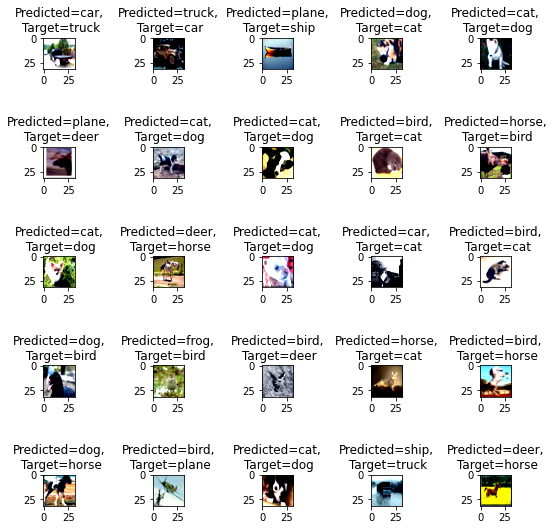

In [18]:
list_of_misclassified_images = misclassified_images(model, device, test_loader, classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or 

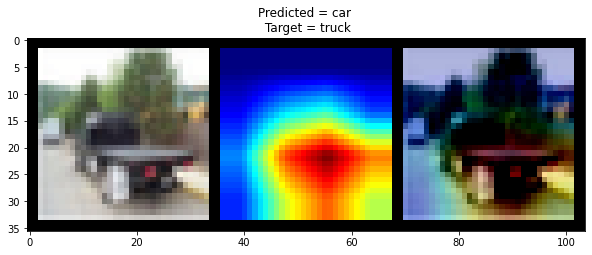

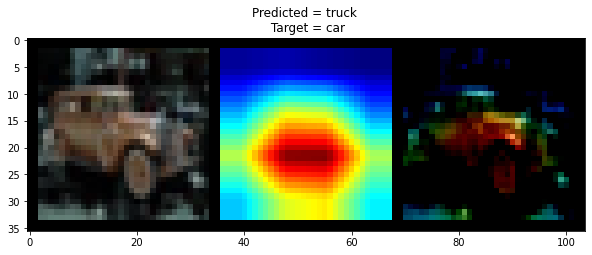

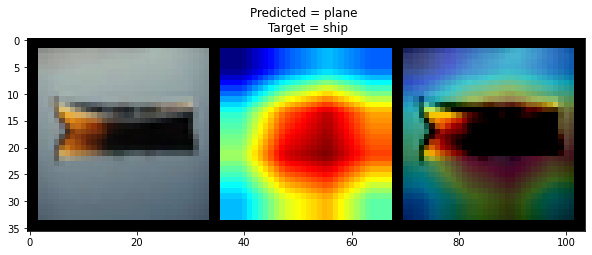

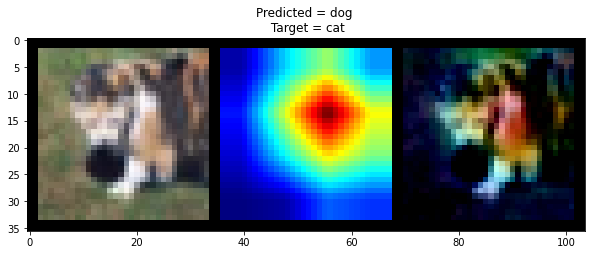

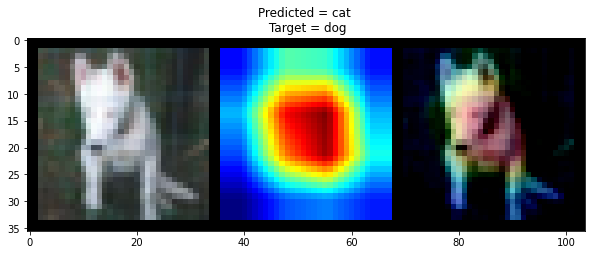

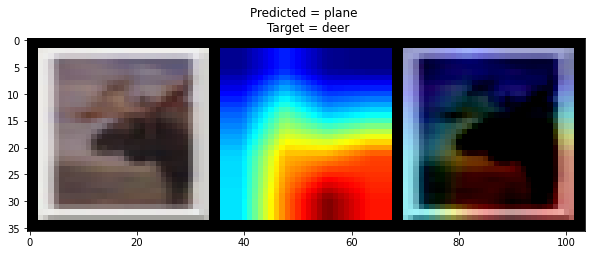

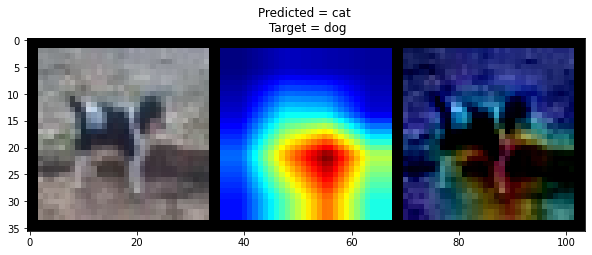

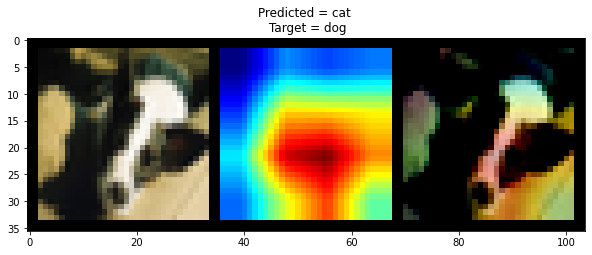

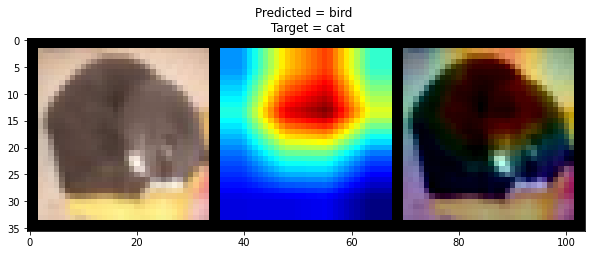

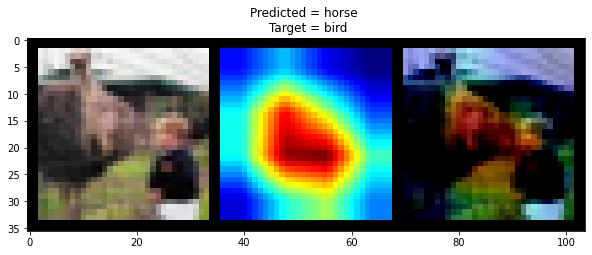

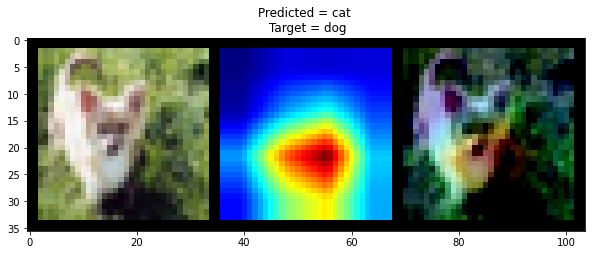

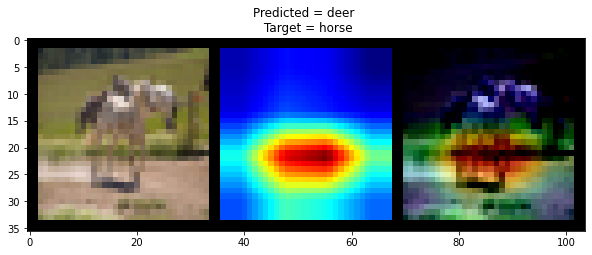

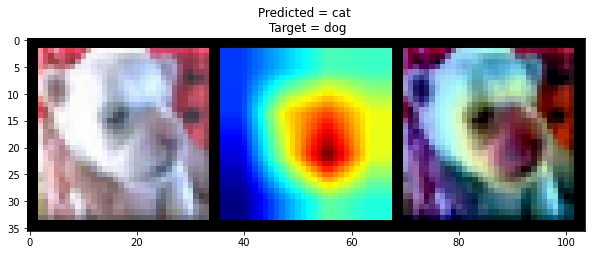

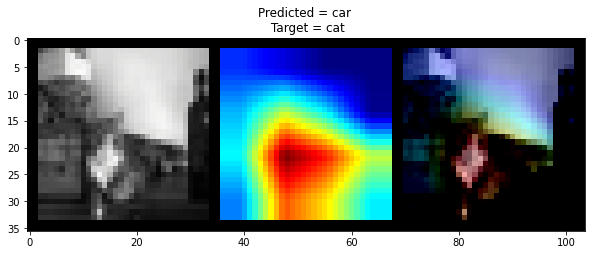

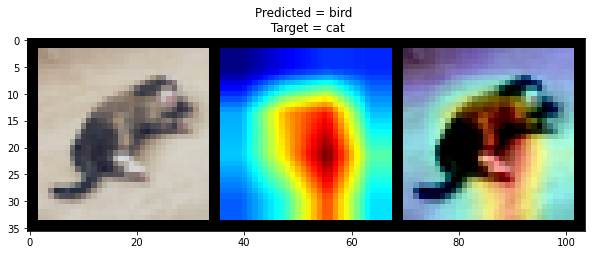

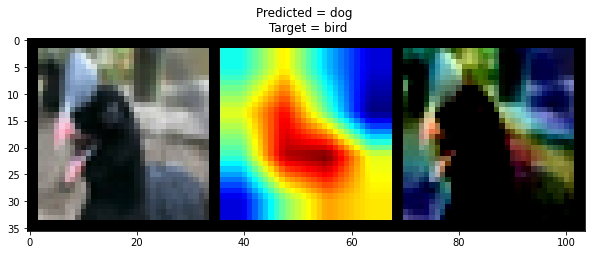

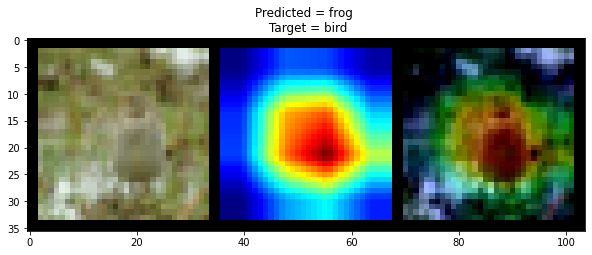

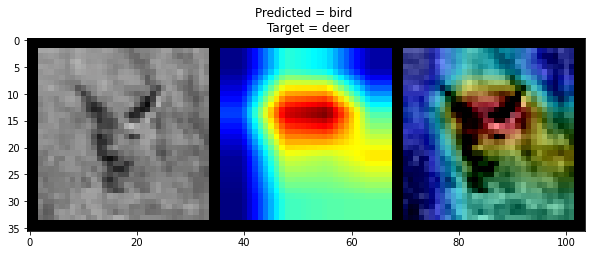

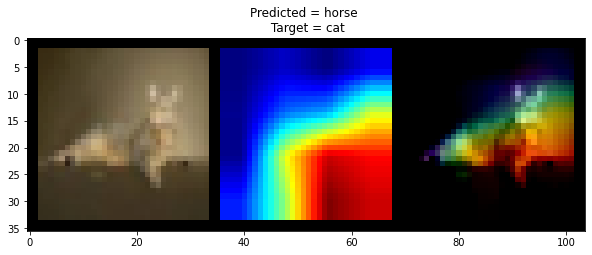

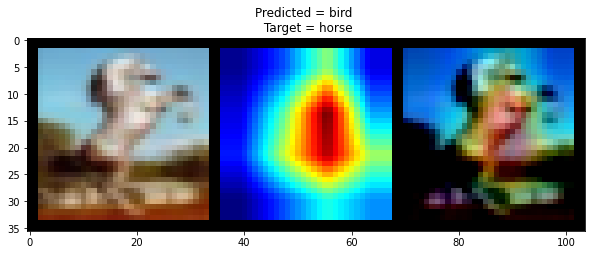

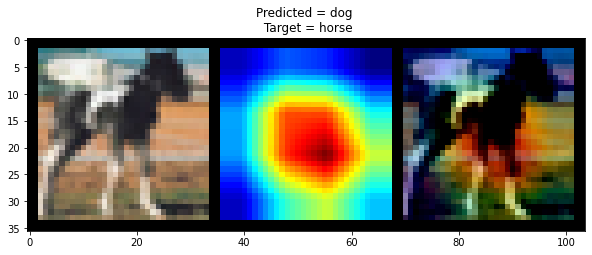

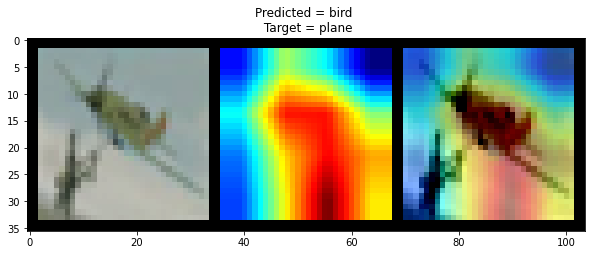

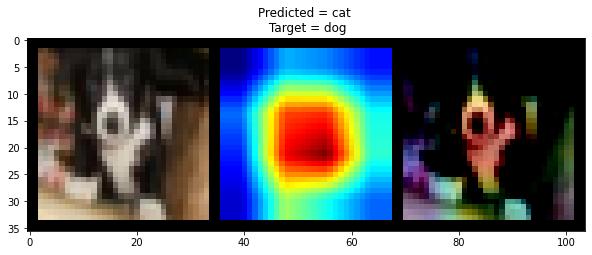

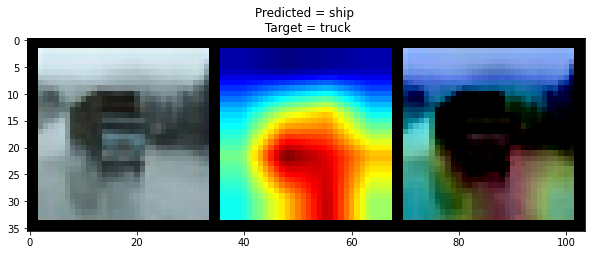

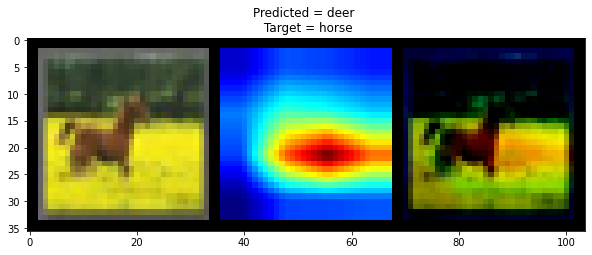

In [19]:
gradcam = GradCAM.from_config(model_type='resnet', arch=model, layer_name='layer4')


def imshow(image,predicted_label, target_label ):
    image = image.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(image, (1, 2, 0)),interpolation='none')
    plt.title(f'Predicted = {classes[int(predicted_label)]} \n Target = {classes[int(target_label)]}')

for misclassified_image in range(25):
  grad_cam_image_result = [denormalize(list_of_misclassified_images[misclassified_image][0].unsqueeze(0), mean, std).squeeze().cpu()]
  image = list_of_misclassified_images[misclassified_image][0].unsqueeze(0)
  predicted_label = list_of_misclassified_images[misclassified_image][1].cpu().numpy()
  target_label = list_of_misclassified_images[misclassified_image][2].cpu().numpy()
  mask, logit = gradcam(image)
  heatmap, cam_result = visualize_cam(mask, image)
  grad_cam_image_result.extend([heatmap])
  grad_cam_image_result.extend([cam_result])
  grid_image = make_grid(grad_cam_image_result,nrow=5)
  imshow(grid_image, predicted_label, target_label)


# Results

Best test accuracy : 90.75% ( 35th Epoch)